In [120]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [121]:
df1=pd.read_csv('DS_DATESET.csv')
#Get shape and head
df1.shape
df=pd.read_csv('DS_DATESET.csv')
labels=df1['Label']
pp= PdfPages('visualizations-output3.pdf')
#newdf = pd.DataFrame(df)
df

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24-09-2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23-10-1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,06-02-1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26-12-1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21-09-1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible
5,Farlay,Anstis,Sangli,Maharashtra,416415,12-02-2000,20,Male,fanstis5@zdnet.com,8429984749,...,PHP,Yes,No,NaN,6,7,NaN,NaN,Twitter,ineligible
6,Vanna,Keighley,Solapur,Maharashtra,413224,18-03-2000,20,Female,vkeighley6@un.org,3929498765,...,PHP,Yes,No,NaN,10,7,NaN,NaN,Facebook,eligible
7,Vikki,Ottawell,Kolhapur,Maharashtra,416004,21-07-1998,21,Female,vottawell7@4shared.com,4906898554,...,C++,No,Yes,NaN,9,9,NaN,NaN,Newspaper,eligible
8,Stanwood,Ferron,Mumbai,Maharashtra,400055,09-12-1999,20,Male,sferron8@vkontakte.ru,8739225175,...,C++,Yes,Yes,NaN,9,10,NaN,NaN,Other,eligible
9,Tommie,Rastall,Kolhapur,Maharashtra,416119,28-10-1997,22,Male,trastall9@canalblog.com,3634744513,...,.Net,No,Yes,NaN,10,10,NaN,NaN,Blog post,ineligible


In [122]:
df1.head()


,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24-09-2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23-10-1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,06-02-1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26-12-1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21-09-1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [123]:
df=df1[['Certifications/Achievement/ Research papers','Link to updated Resume (Google/ One Drive link preferred)','link to Linkedin profile']]


In [124]:
count=df1.isnull().sum()

In [125]:
print(count)

First Name                                                       0
Last Name                                                        0
City                                                             0
State                                                            0
Zip Code                                                         0
DOB [DD/MM/YYYY]                                                 0
Age                                                              0
Gender                                                           0
Email Address                                                    0
Contact Number                                                   0
Emergency Contact Number                                         0
College name                                                     0
University Name                                                  0
Degree                                                           0
Major/Area of Study                                           

In [126]:
df1.fillna("none")

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24-09-2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,none,6,10,none,none,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23-10-1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,none,10,7,none,none,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,06-02-1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,none,8,6,none,none,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26-12-1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,none,9,6,none,none,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21-09-1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,none,8,6,none,none,Facebook,ineligible
5,Farlay,Anstis,Sangli,Maharashtra,416415,12-02-2000,20,Male,fanstis5@zdnet.com,8429984749,...,PHP,Yes,No,none,6,7,none,none,Twitter,ineligible
6,Vanna,Keighley,Solapur,Maharashtra,413224,18-03-2000,20,Female,vkeighley6@un.org,3929498765,...,PHP,Yes,No,none,10,7,none,none,Facebook,eligible
7,Vikki,Ottawell,Kolhapur,Maharashtra,416004,21-07-1998,21,Female,vottawell7@4shared.com,4906898554,...,C++,No,Yes,none,9,9,none,none,Newspaper,eligible
8,Stanwood,Ferron,Mumbai,Maharashtra,400055,09-12-1999,20,Male,sferron8@vkontakte.ru,8739225175,...,C++,Yes,Yes,none,9,10,none,none,Other,eligible
9,Tommie,Rastall,Kolhapur,Maharashtra,416119,28-10-1997,22,Male,trastall9@canalblog.com,3634744513,...,.Net,No,Yes,none,10,10,none,none,Blog post,ineligible


In [127]:
df1['Areas of interest']

0       Artificial Intelligence 
1               Cloud Computing 
2                           IoT 
3             Digital Marketing 
4               Cloud Computing 
5                        Python 
6                   QMS/Testing 
7                  Data Science 
8                   QMS/Testing 
9                           IoT 
10              Machine Learning
11                   Blockchain 
12                          RPA 
13            Digital Marketing 
14                       DevOps 
15                     Big Data 
16                  QMS/Testing 
17              Web Development 
18              Web Development 
19                  QMS/Testing 
20               Cyber Security 
21                   Blockchain 
22              Cloud Computing 
23                     Big Data 
24               Cyber Security 
25              Machine Learning
26              Machine Learning
27      Artificial Intelligence 
28               Cyber Security 
29                       DevOps 
          

In [128]:
#1.no of students applied to different technologies
from collections import Counter
print(Counter(df1['Areas of interest']))


Counter({'DevOps ': 674, 'Machine Learning': 671, 'Python ': 652, 'Cyber Security ': 638, 'Web Development ': 637, 'QMS/Testing ': 633, 'Mobility': 631, 'IoT ': 630, 'Artificial Intelligence ': 627, 'Digital Marketing ': 624, 'Blockchain ': 623, 'Big Data ': 612, 'Data Science ': 601, 'Information Security': 598, 'RPA ': 589, 'Cloud Computing ': 560})


In [129]:
interest_type = df1.groupby('Areas of interest').agg('count')
print(interest_type)

                          First Name  Last Name  City  State  Zip Code  \
Areas of interest                                                        
Artificial Intelligence          627        627   627    627       627   
Big Data                         612        612   612    612       612   
Blockchain                       623        623   623    623       623   
Cloud Computing                  560        560   560    560       560   
Cyber Security                   638        638   638    638       638   
Data Science                     601        601   601    601       601   
DevOps                           674        674   674    674       674   
Digital Marketing                624        624   624    624       624   
Information Security             598        598   598    598       598   
IoT                              630        630   630    630       630   
Machine Learning                 671        671   671    671       671   
Mobility                         631  

In [130]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [131]:
interest_labels = interest_type.City.sort_values().index 
interest_counts = interest_type.City.sort_values()

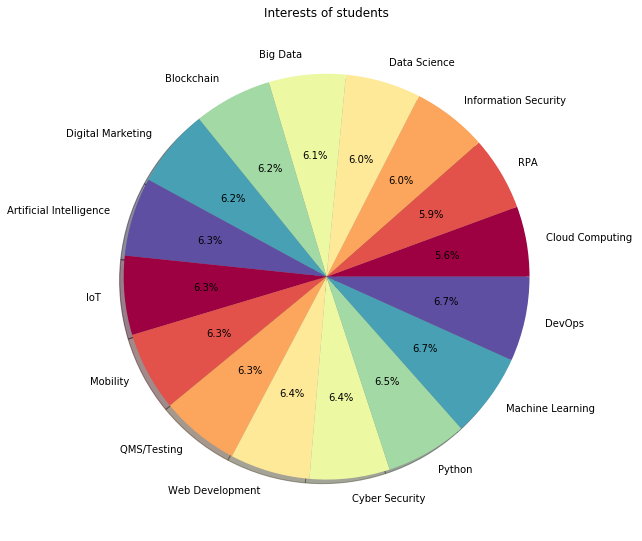

In [132]:
plt.figure(1, figsize=(20,20)) 
the_grid = GridSpec(1, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Interests of students')
type_show_ids = plt.pie(interest_counts, labels=interest_labels, autopct='%1.1f%%', shadow=True, colors=colors)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()


In [133]:
#The number of students applied for Data Science who knew ‘’Python” and            who didn’t


In [134]:
s1=(df1['Areas of interest'] == 'Data Science ').sum()




In [135]:
print(s1)


601


In [136]:
Filtered_df = df1[(df1['Areas of interest'] =='Data Science ' ) & (df1['Programming Language Known other than Java (one major)'] =='Python' )]

In [137]:
s2=len(Filtered_df)
s3=s1-s2

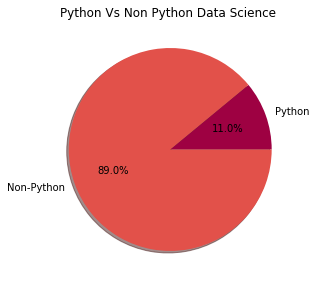

In [138]:
plt.figure(1, figsize=(10,10)) 
the_grid = GridSpec(1, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Python Vs Non Python Data Science ')
c1=[s2,s3]
l1=['Python','Non-Python']
type_show_ids = plt.pie(c1, labels=l1, autopct='%1.1f%%', shadow=True, colors=colors)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()

In [139]:
#The different ways students learned about this program.


In [140]:
df1['How Did You Hear About This Internship?']

0                   Twitter
1       Ex/Current Employee
2                   Twitter
3                   Twitter
4                  Facebook
5                   Twitter
6                  Facebook
7                 Newspaper
8                     Other
9                 Blog post
10                   Intern
11                Newspaper
12                    Other
13                Newspaper
14                  Twitter
15                  Twitter
16                    Other
17                   Intern
18      Ex/Current Employee
19                 LinkedIn
20                    Other
21                   Friend
22                  Twitter
23                 Facebook
24                 Facebook
25      Ex/Current Employee
26                Newspaper
27                Newspaper
28                   Intern
29                Newspaper
               ...         
9970               Facebook
9971                  Other
9972              Newspaper
9973              Blog post
9974                

In [141]:
print(Counter(df1['How Did You Hear About This Internship?']))


Counter({'Intern': 1173, 'Newspaper': 1162, 'Twitter': 1160, 'Blog post': 1116, 'LinkedIn': 1112, 'Friend': 1109, 'Facebook': 1084, 'Other': 1077, 'Ex/Current Employee': 1007})


In [142]:
c_type = df1.groupby('How Did You Hear About This Internship?').agg('count')
print(c_type)

                                         First Name  Last Name  City  State  \
How Did You Hear About This Internship?                                       
Blog post                                      1116       1116  1116   1116   
Ex/Current Employee                            1007       1007  1007   1007   
Facebook                                       1084       1084  1084   1084   
Friend                                         1109       1109  1109   1109   
Intern                                         1173       1173  1173   1173   
LinkedIn                                       1112       1112  1112   1112   
Newspaper                                      1162       1162  1162   1162   
Other                                          1077       1077  1077   1077   
Twitter                                        1160       1160  1160   1160   

                                         Zip Code  DOB [DD/MM/YYYY]   Age  \
How Did You Hear About This Internship?              

In [143]:
c_labels = c_type.City.sort_values().index 
c_counts = c_type.City.sort_values()




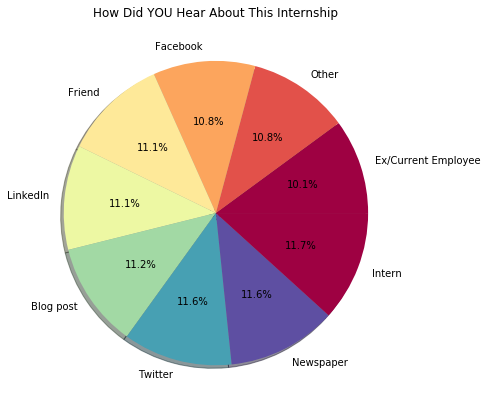

In [144]:
plt.figure(1, figsize=(15,15)) 
the_grid = GridSpec(1, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='How Did YOU Hear About This Internship')
type_show_ids = plt.pie(c_counts, labels=c_labels, autopct='%1.1f%%', shadow=True, colors=colors)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()

In [145]:
#Students who are in the fourth year and have a CGPA greater than 8.0.

In [146]:

s1=(df1['Which-year are you studying in?']== 'Fourth-year').sum()
print(Counter(df1['Which-year are you studying in?']))

Filtered_df = df1[(df1['Which-year are you studying in?'] =='Fourth-year' ) & (df1['CGPA/ percentage'] >8.0 )]


Counter({'Second-year': 2550, 'First-year': 2510, 'Fourth-year': 2477, 'Third-year': 2463})


In [147]:
s=len(Filtered_df)
print(s1)
print(s)
s3=s1-s

2477
1697


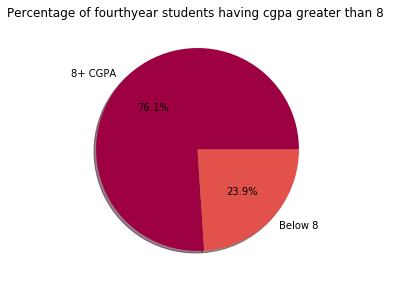

In [148]:
plt.figure(1, figsize=(10,10)) 
the_grid = GridSpec(1, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Percentage of fourthyear students having cgpa greater than 8 ')
c1=[s1,s3]
l1=['8+ CGPA','Below 8']
plt.pie(c1, labels=l1, autopct='%1.1f%%', shadow=True, colors=colors)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()

In [149]:
#Students who applied for Digital Marketing with verbal and written communication score greater than 8.

In [150]:
Filtered_df = df1[(df1['Areas of interest'] =='Digital Marketing ' )&(df1['Rate your verbal communication skills [1-10]']>8.0)&(df1['Rate your written communication skills [1-10]']>8.0)]

In [151]:
s=len(Filtered_df)


In [152]:
print(s)

92


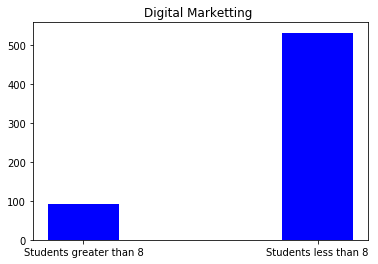

In [153]:
b=532
c_counts=[s,b]
c_labels=['Students greater than 8','Students less than 8']
plt.bar(c_labels,c_counts,width=0.3, color = 'blue')

plt.title('Digital Marketting ')
pp.savefig(dpi=400,bbox_inches="tight")

In [154]:
#Year-wise and area of study wise classification of students

In [155]:
print(Counter(df1['Which-year are you studying in?']))

Counter({'Second-year': 2550, 'First-year': 2510, 'Fourth-year': 2477, 'Third-year': 2463})


In [156]:
c_type = df1.groupby('Which-year are you studying in?').agg('count')
print(c_type)
'''c_labels = c_type.City.sort_values().index 
c_counts = c_type.City.sort_values()'''


                                 First Name  Last Name  City  State  Zip Code  \
Which-year are you studying in?                                                 
First-year                             2510       2510  2510   2510      2510   
Fourth-year                            2477       2477  2477   2477      2477   
Second-year                            2550       2550  2550   2550      2550   
Third-year                             2463       2463  2463   2463      2463   

                                 DOB [DD/MM/YYYY]   Age  Gender  \
Which-year are you studying in?                                   
First-year                                   2510  2510    2510   
Fourth-year                                  2477  2477    2477   
Second-year                                  2550  2550    2550   
Third-year                                   2463  2463    2463   

                                 Email Address  Contact Number  ...    \
Which-year are you studying in?      

'c_labels = c_type.City.sort_values().index \nc_counts = c_type.City.sort_values()'

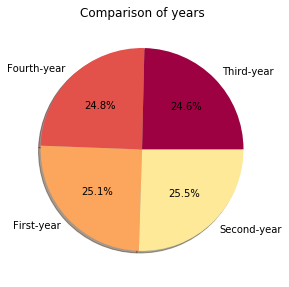

In [157]:
c_labels = c_type.City.sort_values().index 
c_counts = c_type.City.sort_values()
plt.figure(1, figsize=(10,10)) 
the_grid = GridSpec(1, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Comparison of years')
type_show_ids = plt.pie(c_counts, labels=c_labels, autopct='%1.1f%%', shadow=True, colors=colors)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()

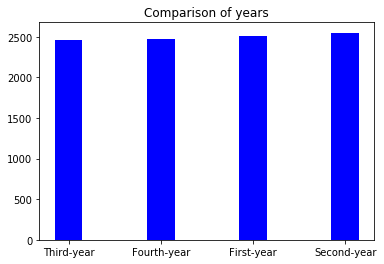

In [158]:
plt.bar(c_labels,c_counts,width=0.3, color = 'blue')
plt.title('Comparison of years')
pp.savefig(dpi=400,bbox_inches="tight")

In [159]:
print(Counter(df1['Major/Area of Study']))

Counter({'Computer Engineering': 5971, 'Electrical Engineering': 2033, 'Electronics and Telecommunication': 1996})


In [160]:
c_type = df1.groupby('Major/Area of Study').agg('count')
print(c_type)


                                   First Name  Last Name  City  State  \
Major/Area of Study                                                     
Computer Engineering                     5971       5971  5971   5971   
Electrical Engineering                   2033       2033  2033   2033   
Electronics and Telecommunication        1996       1996  1996   1996   

                                   Zip Code  DOB [DD/MM/YYYY]   Age  Gender  \
Major/Area of Study                                                           
Computer Engineering                   5971              5971  5971    5971   
Electrical Engineering                 2033              2033  2033    2033   
Electronics and Telecommunication      1996              1996  1996    1996   

                                   Email Address  Contact Number  ...    \
Major/Area of Study                                               ...     
Computer Engineering                        5971            5971  ...     
Electrical En

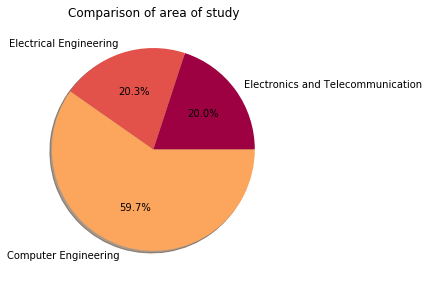

In [161]:
c_labels = c_type.City.sort_values().index 
c_counts = c_type.City.sort_values()

plt.figure(1, figsize=(10,10)) 
the_grid = GridSpec(1, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Comparison of area of study')
type_show_ids = plt.pie(c_counts, labels=c_labels, autopct='%1.1f%%', shadow=True, colors=colors)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()


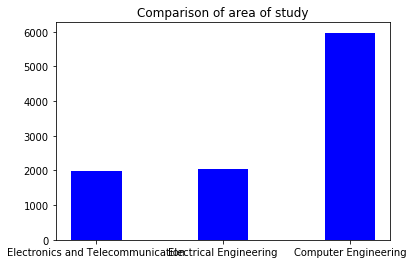

In [162]:
plt.bar(c_labels,c_counts,width=0.4, color = 'blue')
plt.title('Comparison of area of study')
pp.savefig(dpi=400,bbox_inches="tight")

In [163]:
#City and college wise classification of students.

In [164]:
print(Counter(df1['City']))




Counter({'Solapur': 1710, 'NaviMumbai': 1678, 'Sangli': 1670, 'Mumbai': 1648, 'Kolhapur': 1647, 'Pune': 1647})


In [165]:
c_type = df1.groupby('City').agg('count')
print(c_type)

            First Name  Last Name  State  Zip Code  DOB [DD/MM/YYYY]   Age  \
City                                                                         
Kolhapur          1647       1647   1647      1647              1647  1647   
Mumbai            1648       1648   1648      1648              1648  1648   
NaviMumbai        1678       1678   1678      1678              1678  1678   
Pune              1647       1647   1647      1647              1647  1647   
Sangli            1670       1670   1670      1670              1670  1670   
Solapur           1710       1710   1710      1710              1710  1710   

            Gender  Email Address  Contact Number  Emergency Contact Number  \
City                                                                          
Kolhapur      1647           1647            1647                      1647   
Mumbai        1648           1648            1648                      1648   
NaviMumbai    1678           1678            1678          

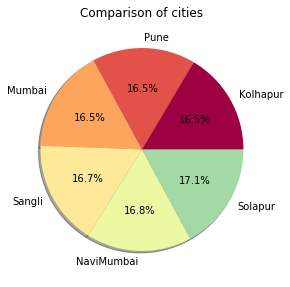

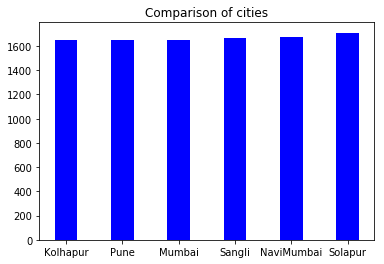

In [166]:
c_labels = c_type.State.sort_values().index 
c_counts = c_type.State.sort_values()

plt.figure(1, figsize=(10,10)) 
the_grid = GridSpec(1, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Comparison of cities')
type_show_ids = plt.pie(c_counts, labels=c_labels, autopct='%1.1f%%', shadow=True, colors=colors)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()
plt.bar(c_labels,c_counts,width=0.4, color = 'blue')
plt.title('Comparison of cities')
pp.savefig(dpi=400,bbox_inches="tight")

In [167]:
print(Counter(df1['College name']))

Counter({'Rajarambapu Institute of Technology': 1670, 'Bharati Vidyapeeth College of Engineering': 834, 'DY Patil College of Engineering And Technology': 813, 'Walchand Institute of Technology': 434, 'Skn Sinhgad College of Engineering': 431, 'Brahmdevdada Mane Institute of Technology': 428, 'Bharat Ratna Indira Gandhi College of Engineering': 417, 'Karamveer Bhauro Patil College': 378, 'Pillai College of Engineering': 356, 'Sinhgad College of Engineering': 340, 'D. Y. Patil College of Engineering': 338, 'Pune Institute of Computer Technology': 329, "Mahatma Gandhi Mission's College of Engineering And Technology": 329, 'Jayawantrao Sawant College of Engineering': 327, 'Vishwakarma Institute of Information Technology': 313, 'A. C. Patil College of Engineering': 309, 'Ramrao Adik Institute of Technology': 306, 'Rizvi College of Engineering': 222, 'K. J. Somaiya College of Engineering': 220, 'Xavier Institute of Engineering': 211, 'Vidyalankar Institute of Technology': 207, 'Thakur Colleg

In [168]:
c_type = df1.groupby('College name').agg('count')
print(c_type)

                                                    First Name  Last Name  \
College name                                                                
A. C. Patil College of Engineering                         309        309   
Bharat Ratna Indira Gandhi College of Engineering          417        417   
Bharati Vidyapeeth College of Engineering                  834        834   
Brahmdevdada Mane Institute of Technology                  428        428   
D. Y. Patil College of Engineering                         338        338   
DY Patil College of Engineering And Technology             813        813   
Jayawantrao Sawant College of Engineering                  327        327   
K. J. Somaiya College of Engineering                       220        220   
Karamveer Bhauro Patil College                             378        378   
Mahatma Gandhi Mission's College of Engineering...         329        329   
Pillai College of Engineering                              356        356   

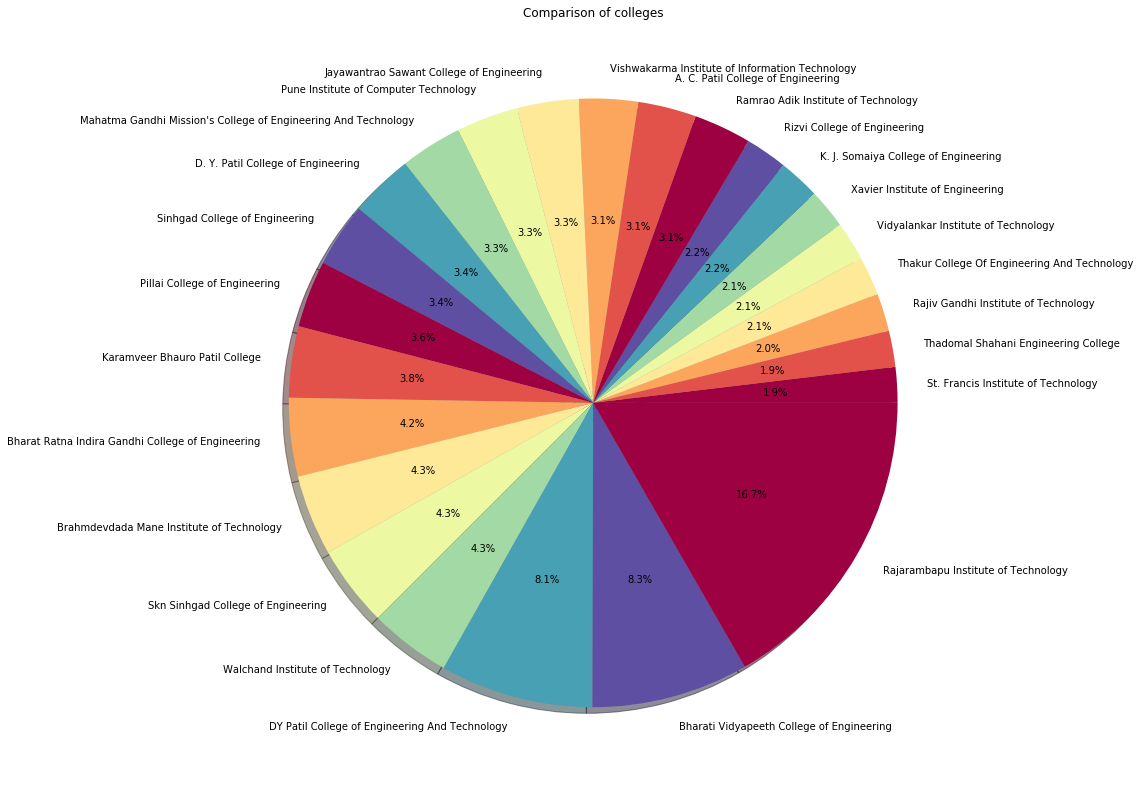

In [169]:
c_labels = c_type['First Name'].sort_values().index 
c_counts = c_type['First Name'].sort_values()

plt.figure(1, figsize=(30,30)) 
the_grid = GridSpec(1, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Comparison of colleges')
type_show_ids = plt.pie(c_counts, labels=c_labels, autopct='%1.1f%%', shadow=True, colors=colors)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()


In [45]:
#h. Plot the relationship between the CGPA and the target variable. 


In [170]:
df1=pd.read_csv('DS_DATESET.csv')
df2 = pd.DataFrame(df1,columns=['CGPA/ percentage','Label'])

df2.head()


,CGPA/ percentage,Label
0,7.26,ineligible
1,8.73,eligible
2,8.61,ineligible
3,7.96,ineligible
4,7.07,ineligible


In [171]:
df2=df2.replace(to_replace=["eligible"],value=1)
df2=df2.replace(to_replace=["ineligible"],value=0)
df2.head()

,CGPA/ percentage,Label
0,7.26,0
1,8.73,1
2,8.61,0
3,7.96,0
4,7.07,0


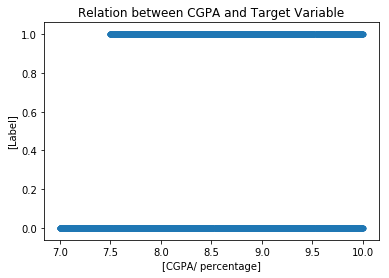

In [172]:
df2.plot.scatter(x=['CGPA/ percentage'],y=['Label'],title='Relation between CGPA and Target Variable')
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()

In [173]:
#Plot the relationship between the Area of Interest and the target variable.
df1=pd.read_csv('DS_DATESET.csv')
df2 = pd.DataFrame(df1,columns=['Areas of interest','Label'])


df2.head()

,Areas of interest,Label
0,Artificial Intelligence,ineligible
1,Cloud Computing,eligible
2,IoT,ineligible
3,Digital Marketing,ineligible
4,Cloud Computing,ineligible


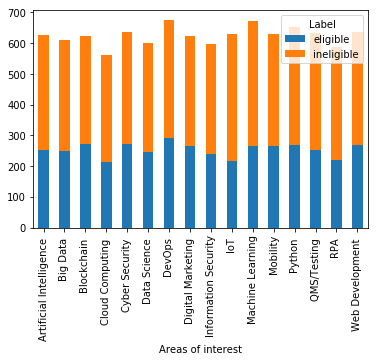

In [174]:
df2.groupby(['Areas of interest','Label']).size().unstack().plot(kind='bar',stacked=True)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()

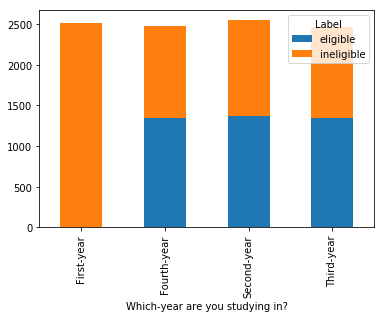

In [175]:
# Plot the relationship between the year of study and the target variable.
df3 = pd.DataFrame(df1,columns=['Which-year are you studying in?','Label'])
df3.groupby(['Which-year are you studying in?','Label']).size().unstack().plot(kind='bar',stacked=True)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()

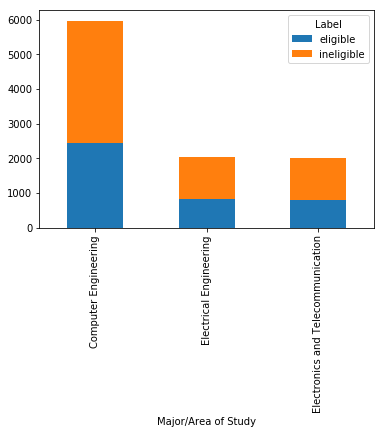

In [176]:
# Plot the relationship between the major, and the target variable.
df4 = pd.DataFrame(df1,columns=['Major/Area of Study','Label'])
df4.groupby(['Major/Area of Study','Label']).size().unstack().plot(kind='bar',stacked=True)
pp.savefig(dpi=400,bbox_inches="tight")
plt.show()

In [177]:
pp.close()



In [54]:
pp